In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load Data

data = pd.read_csv("/content/Health_data_new.csv")

In [3]:
data.head()

,City_ID,State,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate
0,1000,s104,773.177527,823.579167,21.622655,27.606263,7.448700
1,1001,s105,525.493029,607.302537,19.123286,40.786864,10.081136
2,1002,s101,574.615664,627.912321,17.670255,41.327670,9.795441
3,1003,s104,593.601517,640.842500,19.234267,34.235168,9.545358
4,1004,s103,462.664965,533.419684,16.171985,44.218356,10.649668


In [4]:
#Data Exploration
print(data.info())  # Check data types
print(data.isnull().sum())  # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City_ID                     2000 non-null   int64  
 1   State                       2000 non-null   object 
 2   doctor_availability_rate    2000 non-null   float64
 3   hospital_availability_rate  2000 non-null   float64
 4   annual_per_capita           2000 non-null   float64
 5   population_density          2000 non-null   float64
 6   death_rate                  1967 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 109.5+ KB
None
City_ID                        0
State                          0
doctor_availability_rate       0
hospital_availability_rate     0
annual_per_capita              0
population_density             0
death_rate                    33
dtype: int64


In [6]:
#Handle Missing Values
data['death_rate'] = data['death_rate'].fillna(data['death_rate'].mean())  # Fill NaN with mean
print(data.isnull().sum())  # Check missing values

City_ID                       0
State                         0
doctor_availability_rate      0
hospital_availability_rate    0
annual_per_capita             0
population_density            0
death_rate                    0
dtype: int64


In [7]:
#Encode Categorical Variables
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_states = encoder.fit_transform(data[['State']])
state_df = pd.DataFrame(encoded_states, columns=encoder.get_feature_names_out(['State']))
data = pd.concat([data, state_df], axis=1).drop(['State'], axis=1)


In [8]:
#Feature Selection
features = ['doctor_availability_rate', 'hospital_availability_rate', 'annual_per_capita', 'population_density']
X = data[features]
y = data['death_rate']

In [9]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [10]:
#Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make Predictions
y_pred = model.predict(X_test)

In [12]:
#Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 0.6277948119090886


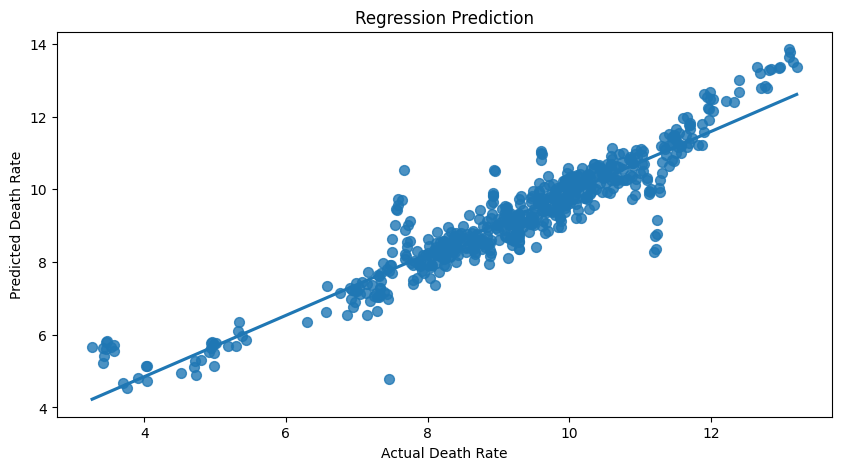

In [13]:
#Visualize Predictions
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={"s": 50})
plt.xlabel("Actual Death Rate")
plt.ylabel("Predicted Death Rate")
plt.title("Regression Prediction")
plt.show()